### Background

This notebook includes an example excercise about the effect of pseudorapidity to the resolution of the CMS detector. The excercise consists of a theory part and a practical part.

# The effect of the pseudorapidity $\eta$ to the resolution of the CMS detector

In this excercise the CMS (Compact Muon Solenoid) detector and the concept of pseudorapidity is introduced. With the real data collected by CMS detector the effect of the pseudorapidity to the resolution of the CMS detector is observed.

### CMS detector

At CERN particles are accelerated and collided with the LHC (Large Hadron Collider) particle accelerator. With the CMS detector the new particles created in these collisions can be observed and measured. There is the opened CMS detector in the picture below.

<img src="Images/CMS_avattu.jpg" alt="CMS-ilmaisin avattuna" style="height: 400px">

(Picture: Domenico Salvagnin, https://commons.wikimedia.org/wiki/File:CMS@CERN.jpg)
<br>
<br>
<br>

### Pseudorapidity

In experimental particle physics pseudorapidity $\eta$ is a spatial coordinate used to describe the angle between a particle and the particle beam. Pseudorapidity is determined by the equation

$$ \eta \equiv -\ln(\tan(\frac{\theta}{2})), $$

where $\theta$ is the angle of a particle relative to the particle beam.

Pseudorapidity thus describes the angle between a detected particle and the particle beam. In the image below the particle beam would go horizontally from left to right. So with the large values of $\eta$ a particle created in the collision would differ just a little from the direction of the beam. With the small values of $\eta$ the deflection is bigger.

<img src="Images/Pseudorapidity_plot.svg" alt="Image of pseudorapidity values" style="height: 200px">

(Image: Wikimedia user Mets501, https://en.wikipedia.org/wiki/Pseudorapidity#/media/File:Pseudorapidity_plot.svg)
<br>
<br>
<br>

### The effect of pseudorapidity to the resolution of the measurement

With the CMS detector for example momenta of particles can be measured. Pseudorapidity $\eta$ affects to the resolution of the measurement of momenta. The particles that hit in the middle part of the detector (in the barrel) can be measured more accurate than the particles that hit in the end of the detector (in the endcap).

The reason for that is probably that the particles that have flown to the endcap have encountered more other matter (other particles) than the particles hit in the barrel. The interaction with other matter will cause inaccuracy to the measurements of the particles hit in the endcap.

In the image below there is a draft of the two particles created in the collision event. One hits the barrel of the detector and another hits the endcap. There are also the values of pseudorapidities $\eta$ and the angles $\theta$ of the particles.

<img src="Images/Sylinteri.svg" alt="Draft of the CMS detector" style="height: 600px">

### Let's start!

Let's start observing how the effect of pseudorapidity to the resolution of the measurement can be seen with the real data collected by the CMS detector.

We will use the data collected in 2011 [1]. From the primary dataset 10851 collision events where have been exactly two muons have been selected to the file "Zmumu_Run2011A_masses.csv". (The selection has been done with the code that is openly available at https://github.com/tpmccauley/dimuon-filter.) The measured momenta and energies of the muons are written in the file.

From the measured values of momenta and energies, the invariant mass for muons for every event is calculated. Invariant mass is a mathematical concept, not a physical mass. Invariant mass is determined by the equation

$$ M = \sqrt{(E_1 + E_2)^2-(\vec{p_1} + \vec{p_2})^2}. $$

In the equation $E_1$ and $E_2$ are the energies of the muons and $\vec{p_1}$ and $\vec{p_2}$ the momenta of the muons.

If the muon pair comes from the decay of Z-boson, the invariant mass calculated to that muon pair equals the physical mass of Z-boson (91.1876 GeV, [Particle Data Group](http://pdg.lbl.gov/2012/listings/rpp2012-list-z-boson.pdf)). If the two muons originate from some other process (there are lots of different processes in the particle collisions) then the invariant mass calculated to them is something else.

Let's observe the invariant masses calculated from different events by plotting a histogram of them. The histogram shows that in how many events the value of the invariant mass has been in the certain value range. With the histogram one can see how close to the Z-boson mass (91.1876 GeV) the different invariant mass values will be.
<br>
<br>
<br>
[1]  CMS collaboration (2016). DoubleMu primary dataset in AOD format from RunA of 2011 (/DoubleMu/Run2011A-12Oct2013-v1/AOD). CERN Open Data Portal. DOI: [10.7483/OPENDATA.CMS.RZ34.QR6N](http://doi.org/10.7483/OPENDATA.CMS.RZ34.QR6N).

### 1) Selecting the events

<img src="Images/Pseudorapidity_plot.svg" alt="Image of pseudorapidity values" style="height: 200px">

First we will select from all the events into two groups the events where the pseudorapidity of the two muons have been relatively large (e.g. $\eta$ > 1.52) and relatively small (e.g. $\eta$ < 0.45). The selection is made with the code below. We want about the same amount of events to both groups so that the comparison could be done.

Perform the selection by running the code below. You can run the code by clicking the code cell active and then pressing _Ctrl_ + _Enter_. The #-separated lines in the code are comments that won't affect to the code.

In [1]:
# Import the needed modules. Pandas is for the data-analysis, numpy for scientific calculation
# and matplotlib.pyplot for making plots. Modules are named as pd, np and plt.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a new DataFrame structure from the file "Zmumu_Run2011A_masses.csv"
dataset = pd.read_csv('Data/Zmumu_Run2011A_masses.csv')

# Set the conditions to large and small etas. These can be changed, but it has to be taken
# care that about the same amount of events are selected in both groups.
cond1 = 1.52
cond2 = 0.45

# Create two DataFrames. Select to "large_etas" events where the pseudorapidities
# of the both muons are larger than "cond1". Select to "small_etas" events where
# the pseudorapidities of the both muons are smaller than "cond2".
large_etas = dataset[(np.absolute(dataset.eta1) > cond1) & (np.absolute(dataset.eta2) > cond1)]
small_etas = dataset[(np.absolute(dataset.eta1) < cond2) & (np.absolute(dataset.eta2) < cond2)]

# Print two empty lines for better design.
print('\n' * 2)

print('The amount of all events = %d' % len(dataset))
print('The amount of events where the pseudorapidity of both muons has been large = %d' %len(large_etas))
print('The amount of events where the pseudorapidity of both muons has been small = %d' %len(small_etas))




The amount of all events = 10851
The amount of events where the pseudorapidity of both muons has been large = 615
The amount of events where the pseudorapidity of both muons has been small = 603


### 2) Creating the histograms

Next we will create the separate histograms of the invariant masses for the events with the large pseudorapidities and with the small pseudorapidities. With the histograms we can compare these two situations.

### Histogram for the large $\eta$ events 

Let's start with the events where the pseudorapidity of both of the muons has been large. Run the code by clicking the code cell active and then pressing _Ctrl_ + _Enter_.

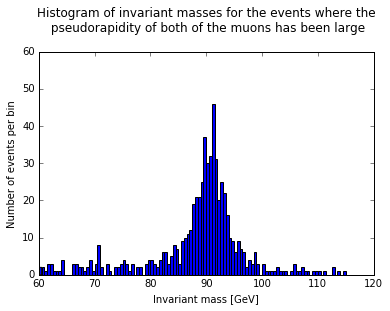

In [2]:
# Save the invariant masses to variable "inv_mass1".
inv_mass1 = large_etas['M']

# Jupyter Notebook uses "magic functions". With this function it is possible to plot
# the histogram straight to notebook.
% matplotlib inline

# Create the histogram from data in variable "inv_mass1". Set bins and range.
plt.hist(inv_mass1, bins=120, range=(60,120))

# Set y-axis range from 0 to 60.
axes = plt.gca()
axes.set_ylim([0,60])

# Name the axises and give a title.
plt.xlabel('Invariant mass [GeV]')
plt.ylabel('Number of events per bin')
plt.title('Histogram of invariant masses for the events where the\n pseudorapidity of both of the muons has been large\n')
plt.show()


### Histogram for the small $\eta$ events

Analogously than above, let's plot the histogram of the invariant masses for the events where the pseudorapidity of both of the muons has been small.

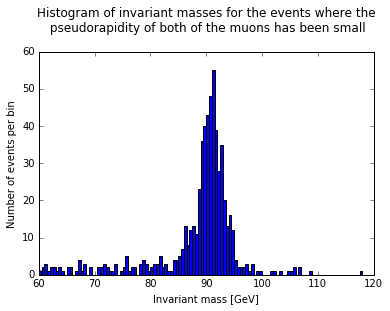

In [3]:
# Save the invariant masses to variable "inv_mass2".
inv_mass2 = small_etas['M']

# Jupyter Notebook uses "magic functions". With this function it is possible to plot
# the histogram straight to notebook.
% matplotlib inline

# Create the histogram from data in variable "inv_mass1". Set bins and range.
plt.hist(inv_mass2, bins=120, range=(60,120))

# Set y-axis range from 0 to 60.
axes = plt.gca()
axes.set_ylim([0,60])

# Name the axises and give a title.
plt.xlabel('Invariant mass [GeV]')
plt.ylabel('Number of events per bin')
plt.title('Histogram of invariant masses for the events where the\n pseudorapidity of both of the muons has been small\n')
plt.show()


### 3) Excercise

Now we have created from the real CMS data the two histograms of the invariant masses. With the help of the histograms and the theory part of the notebook think about the following questions:

__In which way you can see the effect of the pseudorapidity to the measurement resolution of the CMS detector?__

__Do your results show the same than the theory predicts?__

After answering to the questions you can try to change the conditions for the large and small pseudorapidities in the first code cell. The conditions are named _cond1_ and _cond2_. Take care that you choose conditions in a way that there will be nearly same amount of events in both of the groups.

After the changes run the code again. How do the changes affect to the number of the events? And how to the histograms?